#Context

this code was based on Tensorflows documentation for using an RNN for text sentiment analyisis and Google Colab pro copilot

The model was trained on Google colab pro using an A100 gpu and high memory mode for maximum training

https://www.tensorflow.org/text/tutorials/text_classification_rnn

In [ ]:
import numpy as np
import keras

import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteP5XEBN/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteP5XEBN/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteP5XEBN/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
encoder = tf.keras.layers.TextVectorization(max_tokens=1000)
encoder.adapt(train_dataset.map(lambda text, label: text))

vocab = np.array(encoder.get_vocabulary())

## Googles RNN model

To skip the training process, import the model_history.pkl file

In [ ]:
model = keras.models.load_model('/content/RNN_model_sent_analysis_withoutPP.keras')

FileNotFoundError: [Errno 2] No such file or directory: 'model_history.pkl'

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=15, validation_data=test_dataset,validation_steps=30)

Epoch 1/15
391/391 [==============================] - 28s 70ms/step - loss: 0.3785 - accuracy: 0.8291 - val_loss: 0.3566 - val_accuracy: 0.8510
Epoch 2/15
391/391 [==============================] - 26s 65ms/step - loss: 0.3319 - accuracy: 0.8543 - val_loss: 0.3269 - val_accuracy: 0.8604
Epoch 3/15
391/391 [==============================] - 28s 71ms/step - loss: 0.3164 - accuracy: 0.8634 - val_loss: 0.3212 - val_accuracy: 0.8630
Epoch 4/15
391/391 [==============================] - 26s 67ms/step - loss: 0.3106 - accuracy: 0.8662 - val_loss: 0.3238 - val_accuracy: 0.8479
Epoch 5/15
391/391 [==============================] - 25s 64ms/step - loss: 0.3060 - accuracy: 0.8679 - val_loss: 0.3329 - val_accuracy: 0.8620
Epoch 6/15
391/391 [==============================] - 27s 67ms/step - loss: 0.3046 - accuracy: 0.8689 - val_loss: 0.3178 - val_accuracy: 0.8578
Epoch 7/15
391/391 [==============================] - 25s 65ms/step - loss: 0.3030 - accuracy: 0.8697 - val_loss: 0.3222 - val_accuracy:

In [ ]:
results = model.evaluate(test_dataset)

print(results)

391/391 [==============================] - 13s 33ms/step - loss: 0.3192 - accuracy: 0.8492
[0.3192073106765747, 0.8491600155830383]


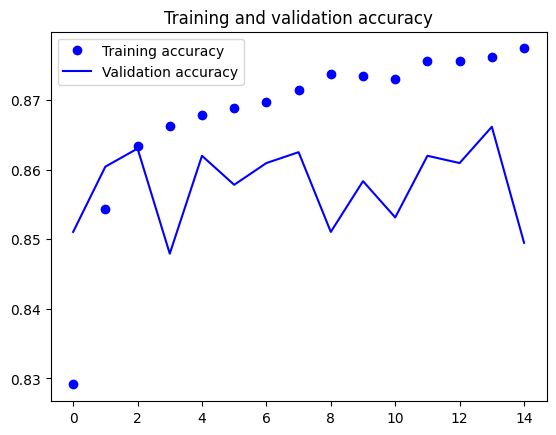

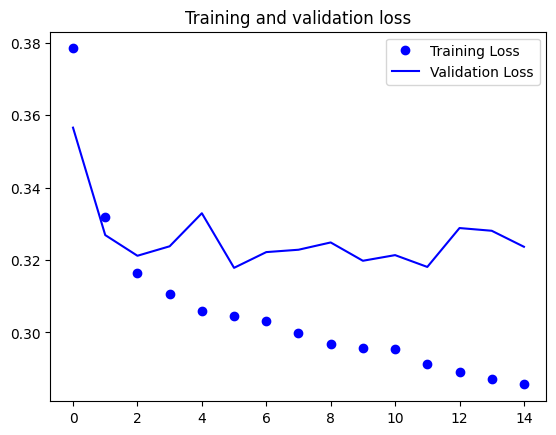

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('RNN_model_sent_analysis_WithoutPP.keras')

### Test on sample text here

In [ ]:
def SentimentAnalysis(Text):
  pred = model.predict(np.array([Text]))
  if pred > 0.5:
    print('Very positive',pred[0][0])
  elif pred >0.2:
    print('Positive',pred[0][0])
  elif pred < 0.2 and pred >-0.2:
    print('Neutral',pred[0][0])
  elif pred < -0.5:
    print('Very Negative',pred[0][0])
  elif pred < -0.2:
    print('Negative',pred[0][0])

In [ ]:
SentimentAnalysis('Good')
SentimentAnalysis('Bad')
SentimentAnalysis('No comment')
SentimentAnalysis('I enjoy your service.')
SentimentAnalysis('I do not enjoy your service.')
SentimentAnalysis('I would recommend your service.')
SentimentAnalysis('I would not recommend your service.')
SentimentAnalysis('It could be worse')
SentimentAnalysis('It could be better')

1/1 [==============================] - 0s 21ms/step
Positive 0.39001748
1/1 [==============================] - 0s 19ms/step
Very Negative -1.1306093
1/1 [==============================] - 0s 19ms/step
Neutral -0.07620796
1/1 [==============================] - 0s 19ms/step
Very positive 0.6791152
1/1 [==============================] - 0s 20ms/step
Positive 0.29491594
1/1 [==============================] - 0s 19ms/step
Negative -0.29756162
1/1 [==============================] - 0s 19ms/step
Very Negative -0.57914555
1/1 [==============================] - 0s 19ms/step
Very Negative -1.6833533
1/1 [==============================] - 0s 20ms/step
Negative -0.3890663


In [ ]:
while True:
  validation_text = input('Type:')
  print(SentimentAnalysis(validation_text))


1/1 [==============================] - 0s 21ms/step
Very positive 4.1164613
None
1/1 [==============================] - 0s 21ms/step
Very Negative -3.7391605
None
1/1 [==============================] - 0s 21ms/step
Very Negative -0.5131534
None
